In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/minjeong/Downloads/train.csv')
df

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
0,20210601,A060310,3S,166690,2890,2970,2885,2920
1,20210601,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,20210601,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,20210601,A054620,APS,462544,14600,14950,13800,14950
4,20210601,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...,...
987995,20230530,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,20230530,A000540,흥국화재,50218,3250,3255,3195,3215
987997,20230530,A003280,흥아해운,130664,1344,1395,1340,1370
987998,20230530,A037440,희림,141932,9170,9260,9170,9200


In [5]:
df = df[df['종목코드']=='A000120']
df

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
16,20210601,A000120,CJ대한통운,46783,170000,170500,168500,169500
2016,20210602,A000120,CJ대한통운,48773,169500,170500,168000,168500
4016,20210603,A000120,CJ대한통운,46776,168500,170000,168000,170000
6016,20210604,A000120,CJ대한통운,76675,168500,169500,166500,167000
8016,20210607,A000120,CJ대한통운,49827,167000,168000,166000,166500
...,...,...,...,...,...,...,...,...
978016,20230523,A000120,CJ대한통운,45524,83100,85100,82500,84200
980016,20230524,A000120,CJ대한통운,57215,83700,85800,83500,85600
982016,20230525,A000120,CJ대한통운,48707,84600,85400,83000,83000
984016,20230526,A000120,CJ대한통운,26045,82600,84100,82100,83700


In [6]:
# Volume(거래량), Open(시가), High(고가), Low(저가), Close(종가)
df.shape

(494, 8)

In [7]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator / (denominator + 1e-7)

In [8]:
dfx = df[['시가', '고가', '저가', '종가', '거래량']]
dfx = MinMaxScaler(dfx)

dfy = dfx[['종가']]
dfx = dfx[['시가', '고가', '저가', '종가', '거래량']]

dfx

,시가,고가,저가,종가,거래량
16,0.858577,0.857537,0.873596,0.857929,0.024357
2016,0.854015,0.857537,0.868914,0.848763,0.025951
4016,0.844891,0.852941,0.868914,0.862511,0.024352
6016,0.844891,0.848346,0.854869,0.835014,0.048303
8016,0.831204,0.834559,0.850187,0.830431,0.026796
...,...,...,...,...,...
978016,0.065693,0.072610,0.068352,0.076077,0.023349
980016,0.071168,0.079044,0.077715,0.088909,0.032714
982016,0.079380,0.075368,0.073034,0.065078,0.025899
984016,0.061131,0.063419,0.064607,0.071494,0.007744


In [9]:
dfx.describe()

,시가,고가,저가,종가,거래량
count,494.000000,494.000000,494.000000,494.000000,494.000000
mean,0.405817,0.410323,0.408149,0.406712,0.028630
std,0.285500,0.290037,0.290604,0.287055,0.050084
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.131387,0.127528,0.129448,0.127635,0.011691
50%,0.411496,0.420956,0.419476,0.417965,0.019576
75%,0.539234,0.543888,0.541199,0.540559,0.033365
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
dfy.head()

,종가
16,0.857929
2016,0.848763
4016,0.862511
6016,0.835014
8016,0.830431


In [11]:
time_step = 10
step = 1

def create_dataset(X, y, time_step, step):
    Xs, ys = [], []

    for i in range(0, len(X) - time_step, step):
        v = X.iloc[i : (i + time_step)].values
        labels = y.iloc[i + time_step]

        Xs.append(v)
        ys.append(labels)

    return np.array(Xs), np.array(ys)

In [12]:
X, y = create_dataset(dfx, dfy, time_step, step)

X.shape

(484, 10, 5)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((324, 10, 5), (160, 10, 5), (324, 1), (160, 1))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

In [15]:
model = Sequential([
    SimpleRNN(20, activation='relu', input_shape=(X.shape[1:]), return_sequences=True),
    Dropout(0.5),
    SimpleRNN(20, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10, 20)            520       
                                                                 
 dropout (Dropout)           (None, 10, 20)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20)                820       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1361 (5.32 KB)
Trainable params: 1361 (5.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(loss='mse', optimizer='adam')

In [18]:
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.33, shuffle=False)

Epoch 1/500
7/7 [==============================] - 1s 20ms/step - loss: 0.3919 - val_loss: 0.0050
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 0.2013 - val_loss: 0.0035
Epoch 3/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1621 - val_loss: 0.0094
Epoch 4/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1048 - val_loss: 0.0159
Epoch 5/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1393 - val_loss: 0.0216
Epoch 6/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1244 - val_loss: 0.0194
Epoch 7/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1181 - val_loss: 0.0134
Epoch 8/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0877 - val_loss: 0.0146
Epoch 9/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0887 - val_loss: 0.0111
Epoch 10/500
7/7 [==============================] - 0s 3ms/step - loss: 0.0788 - val_loss: 0.0126
Epoch 11/500
7/7 [==========

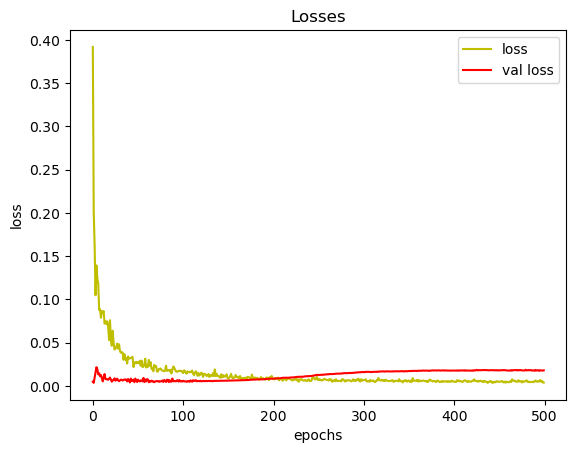

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.arange(0, len(history.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [21]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 995us/step


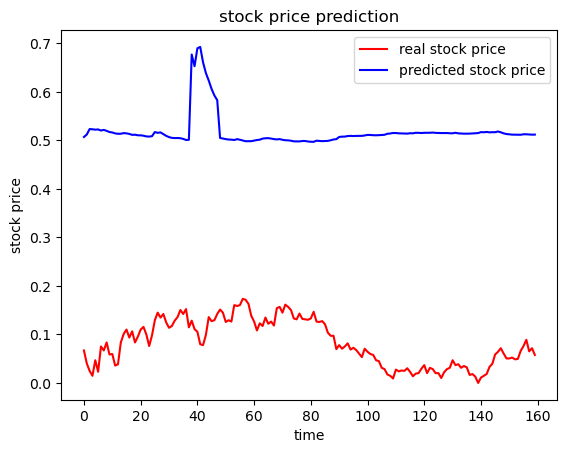

In [22]:
y_pred.shape

plt.plot(y_test, color='red', label='real stock price')
plt.plot(y_pred, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()